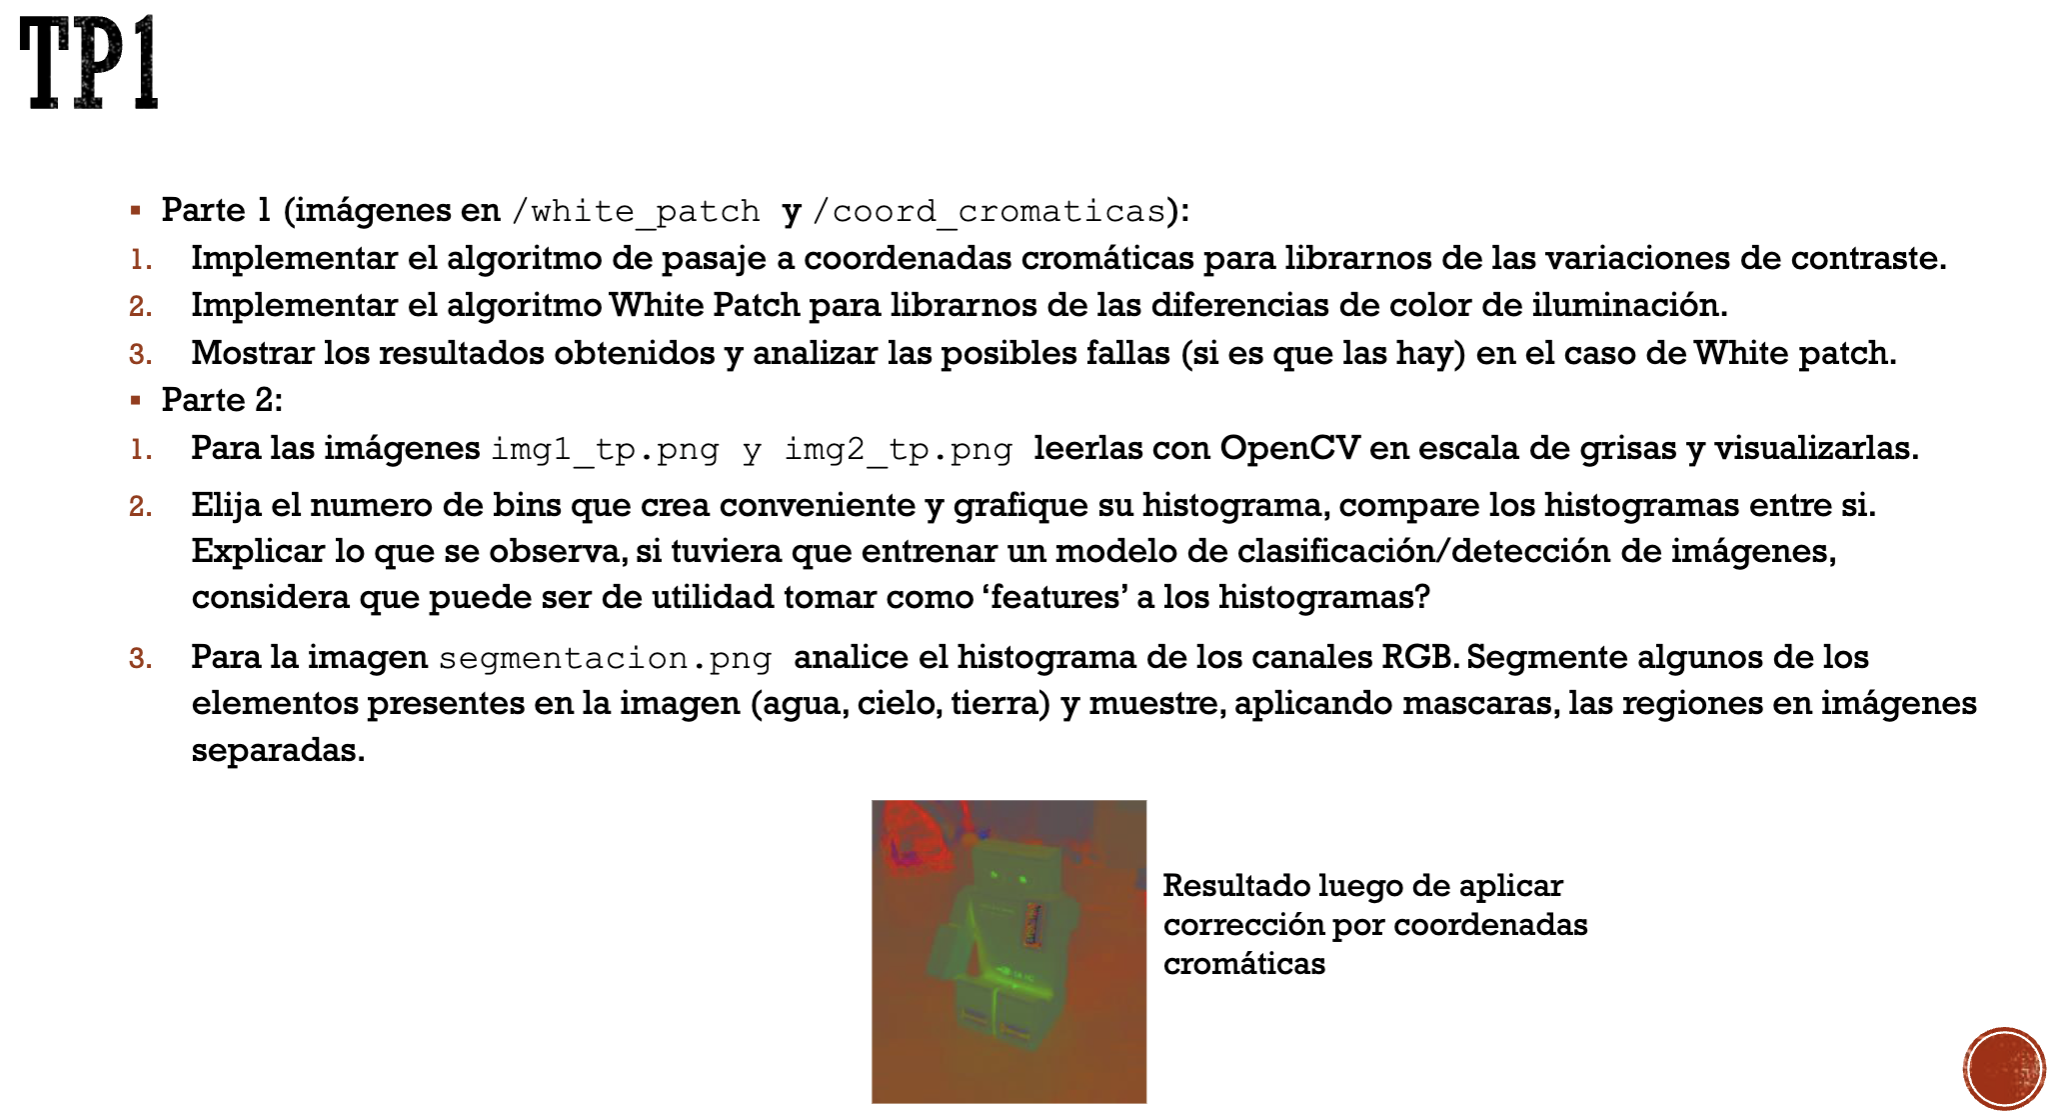

Alumno: SILVA, VÍCTOR DAVID

CEIA: cohorte 14

Bimestre: 2

Año: 2024

In [39]:
# Dependencias
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Parte 1

1. Implementación del algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [40]:
def coordenadas_cromaticas(input_image:np.array) -> np.array:
    """
    Esta función toma una imagen de entrada y la devuelve aplicando coordenadas cromáticas
    
    :param input_image: imagen de entrada a la cual se le aplicará la función de coordenadas_cromaticas.
    :type input_image: np.array
    """

    # Se separan los canales
    im_r, im_g, im_b = cv.split(input_image)

    # Se suman los canales con el método add de cv
    channel_sum = cv.add(cv.add(im_r, im_g), im_b)

    # Si es cero, asignar un valor pequeño para evitar la división por cero
    channel_sum = np.where(channel_sum == 0, 1, channel_sum)

    # Se dividide 255 por la suma de los tres canales y se lo multiplica al canal correspondiente
    im_r_cc = (255 / channel_sum * im_r).astype('uint8')
    im_g_cc = (255 / channel_sum * im_g).astype('uint8')
    im_b_cc = (255 / channel_sum * im_b).astype('uint8')

    # Se unen los canales en una imagen
    img_cc = cv.merge((im_r_cc, im_g_cc, im_b_cc))

    return img_cc

2. Implementación del algoritmo white patch. White patch me da cierta inmunidad al cambio de la longitud de onda de la luz.

In [41]:
def white_patch(input_image:np.ndarray) -> np.ndarray: 
    """
    Esta función toma una imagen de entrada y la devuelve aplicando white patch
    
    :param input_image: imagen de entrada a la cual se le aplicará la función de white_patch.
    :type input_image: np.array
    """
    
    # Se separan los canales
    im_r, im_g, im_b = cv.split(input_image)

    # Se busca el máximo de cada canal
    im_r_max = im_r.max()
    im_g_max = im_g.max()
    im_b_max = im_b.max()

    # Se cumprueba si el máximo de todos los canales es 255, entonces se toma un percentil
    if im_r_max == 255 and im_g_max == 255 and im_b_max == 255:
        im_r_max = np.percentile(im_r.flatten(), 99)
        im_g_max = np.percentile(im_g.flatten(), 99)
        im_b_max = np.percentile(im_b.flatten(), 99)

    # Si el máximo de un canal es cero, se asigna un valor pequeño para evitar la división por cero
    im_r_max = np.where(im_r_max == 0, 1, im_r_max)
    im_g_max = np.where(im_g_max == 0, 1, im_g_max)
    im_b_max = np.where(im_b_max == 0, 1, im_b_max)
        
    # Se normalizan los canales prevenir la saturación y se lo multiplica al canal correspondiente
    im_r_wp = np.clip((255.0 / im_r_max * im_r), 0, 255).astype('uint8')
    im_g_wp = np.clip((255.0 / im_g_max * im_g), 0, 255).astype('uint8')
    im_b_wp = np.clip((255.0 / im_b_max * im_b), 0, 255).astype('uint8')

    # Se unen los canales en una imagen
    img_wp = cv.merge((im_r_wp, im_g_wp, im_b_wp))

    return img_wp

3. Mostrar los resultados obtenidos.

Se comienzan mostrando los resultados para coordenadas cromáticas.

In [42]:
# Se configura el tamaño de la figura
plt.figure(figsize=(10, 16))

# Se muestra la imagen
img = cv.imread('coord_cromaticas/CoordCrom_1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('CoordCrom_1')

# Se usa coordenadas cromáticas en la imagen y se muestra
img_mod = coordenadas_cromaticas(input_image=img)
plt.subplot(3, 2, 2)
plt.imshow(img_mod)
plt.title('CoordCrom_1 algoritmo coordenadas_cromaticas aplicado')

# Se muestra la imagen
img = cv.imread('coord_cromaticas/CoordCrom_2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 3)
plt.imshow(img)
plt.title('CoordCrom_2')

# Se usa coordenadas cromáticas en la imagen y se muestra
img_mod = coordenadas_cromaticas(input_image=img)
plt.subplot(3, 2, 4)
plt.imshow(img_mod)
plt.title('CoordCrom_2 algoritmo coordenadas_cromaticas aplicado')

# Se muestra la imagen
img = cv.imread('coord_cromaticas/CoordCrom_3.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 5)
plt.imshow(img)
plt.title('CoordCrom_3')

# Se usa coordenadas cromáticas en la imagen y se muestra
img_mod = coordenadas_cromaticas(input_image=img)
plt.subplot(3, 2, 6)
plt.imshow(img_mod)
plt.title('CoordCrom_3 algoritmo coordenadas_cromaticas aplicado')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()


Notar que en el algoritmo que se tuvo que realizar una comprobación para que en el caso de que la suma sea igual a cero, se reemplaze el resultado por un valor pequeño para que no se divida por cero.

Ahora se muestran los resultados para la aplicación del algoritmo de White patch.
Se comienza con los archivos test_red, test_green y test_blue.

In [43]:
# Se configura el tamaño de la figura
plt.figure(figsize=(10, 16))

# Se muestra la imagen
img = cv.imread('white_patch/test_blue.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('wp blue')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 2)
plt.imshow(img_mod)#cv.cvtColor(img_mod, cv.COLOR_BGR2RGB))
plt.title('wp blue white patch')

# Se muestra la  imagen
img = cv.imread('white_patch/test_green.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 3)
plt.imshow(img)
plt.title('wp green')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 4)
plt.imshow(img_mod)#cv.cvtColor(img_mod, cv.COLOR_BGR2RGB))
plt.title('wp green white patch')

# Se muestra la imagen
img = cv.imread('white_patch/test_red.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 5)
plt.imshow(img)
plt.title('wp red')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 6)
plt.imshow(img_mod)#cv.cvtColor(img_mod, cv.COLOR_BGR2RGB))
plt.title('wp red white patch')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()

Se observa que funcionó satisfactoriamente. Todos estos archivos eran del tipo .png.

Ahora se usará White patch con archivos también del tipo .png pero con otro del tipo .jpg que sería el wp_blue.

In [44]:
# Se configura el tamaño de la figura
plt.figure(figsize=(10, 16))

# Se muestra la imagen
img = cv.imread('white_patch/wp_blue.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('wp blue')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 2)
plt.imshow(img_mod)
plt.title('wp blue white patch')

# Se muestra la imagen
img = cv.imread('white_patch/wp_green.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 3)
plt.imshow(img)
plt.title('wp green')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 4)
plt.imshow(img_mod)
plt.title('wp green white patch')

# Se muestra la imagen
img = cv.imread('white_patch/wp_red.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 5)
plt.imshow(img)
plt.title('wp red')

# Se usa white patch en la imagen y se muestra
img_mod = white_patch(input_image=img)
plt.subplot(3, 2, 6)
plt.imshow(img_mod)
plt.title('wp red white patch')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()

Notar que se tuvo que realizar una comprobación para que en el caso del que el máximo valor del canal sea 255, se reemplaze el resultado por percentil del valor máximo y el canal no se multiplique por 1.

# Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [45]:
plt.figure()

# Se visualiza la imagen en tonos de grises
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('img1_tp.png')

# Se visualiza la imagen en tonos de grises
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('img2_tp.png')

plt.show()

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?

In [46]:
# Nueva figura
fig = plt.figure()

# Imagen 1
ax1=plt.subplot(421)
ax1.imshow(img1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('img1_tp.png')

# Histograma con 256 bins
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax3=plt.subplot(423)
ax3.plot(hist1)
ax3.set_title('img1_tp histograma con 256 bins')

# Histograma con 128 bins
hist1,bins1 = np.histogram(img1.ravel(),128,[0,256])
ax5=plt.subplot(425)
ax5.plot(hist1)
ax5.set_title('img1_tp histograma con 128 bins')

# Histograma con 64 bins
hist1,bins1 = np.histogram(img1.ravel(),64,[0,256])
ax7=plt.subplot(427)
ax7.plot(hist1)
ax7.set_title('img1_tp histograma con 64 bins')

# Imagen 2
ax2=plt.subplot(422)
ax2.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax2.set_title('img2_tp.png')

# Histograma con 256 bins
hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax4=plt.subplot(424)
ax4.plot(hist2)
ax4.set_title('img2_tp histograma con 256 bins')

# Histograma con 128 bins
hist2,bins2 = np.histogram(img2.ravel(),128,[0,256])
ax6=plt.subplot(426)
ax6.plot(hist2)
ax6.set_title('img2_tp histograma con 128 bins')

# Histograma con 64 bins
hist2,bins2 = np.histogram(img2.ravel(),64,[0,256])
ax8=plt.subplot(428)
ax8.plot(hist2)
ax8.set_title('img2_tp histograma con 64 bins')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()


Se observa que a pesar de ser imágenes totalmente diferentes, en ambos casos se obtiene el mismo histograma para la misma cantidad de bins. Se realizaron pruebas con 256, 128 y 64 y en todas ellas se mantienen los histogramas iguales.

Si se tuviera que entrenar un modelo de clasificación/detección de imágenes, consideraría que en general sería de utilidad tomar como 'features' a los histogramas, pero puede darse el caso, como en este ejemplo que no serviría.


3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas

In [47]:
img = cv.imread('segmentacion.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Se separa la imagen por canales
img_r, img_g, img_b = cv.split(img)

# Se muestra la imagen a segmentar
#fig = plt.figure()
plt.figure(figsize=(10,8))

# Se muestra la imagen original
plt.subplot(411)
plt.imshow(img)
plt.title('Imagen a segmentar')

# Se muestra el canal rojo de la imagen
plt.subplot(412)
plt.imshow(cv.cvtColor(img_r, cv.COLOR_BGR2RGB))
plt.title('Canal rojo')

# Se muestra el canal verde de la imagen
plt.subplot(413)
plt.imshow(cv.cvtColor(img_g, cv.COLOR_BGR2RGB))
plt.title('Canal verde')

# Se muestra el canal azul de la imagen
plt.subplot(414)
plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.title('Canal azul')

# Se ajusta el diseño
plt.tight_layout()

plt.show()

Se observa la imagen a segmentar y la separación de la misma en los canales RGB.

A continuación se graficará el histograma de cada uno de los canales.

In [48]:
# Nueva figura
fig = plt.figure()

# Histograma canal r
hist_r,bins_r = np.histogram(img_r.ravel(),256,[0,256])
ax1=plt.subplot(131)
ax1.plot(hist_r, 'r')
ax1.set_title('Histograma canal r')

# Histograma canal g
hist_g,bins_g = np.histogram(img_g.ravel(),256,[0,256])
ax2=plt.subplot(132)
ax2.plot(hist_g, 'g')
ax2.set_title('Histograma canal g')

# Histograma canal b
hist_b,bins_b = np.histogram(img_b.ravel(),256,[0,256])
ax3=plt.subplot(133)
ax3.plot(hist_b, 'b')
ax3.set_title('Histograma canal b')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()

Se va a usar un descriptor estadístico para identificar el cielo, el agua y la tierra

In [51]:
# Tomamos una muestra de cada uno
img_sample_sky = img[100:200, 400:600, :]
img_sample_water = img[300:325, 375:400, :]
img_sample_earth = img[500:600, 175:275, :]

# Se obtiene la media y el desvío estandar de cada muestra
color_mean_sky, color_std_sky = cv.meanStdDev(img_sample_sky)
color_mean_water, color_std_water = cv.meanStdDev(img_sample_water)
color_mean_earth, color_std_earth = cv.meanStdDev(img_sample_earth)

# Se elige arbitrariamente un determinado sigma y en conjunto con la media y el desvío estandar de la muestra se obtiene una máscara para elemento
n_sigma_sky = 7
mask_sky = cv.inRange(img, color_mean_sky-color_std_sky * n_sigma_sky,  color_mean_sky+color_std_sky * n_sigma_sky)
img_segmented_sky = cv.bitwise_and(img, img, mask=mask_sky)

n_sigma_water = 1
mask_water = cv.inRange(img, color_mean_water-color_std_water * n_sigma_water,  color_mean_water+color_std_water * n_sigma_water)
img_segmented_water = cv.bitwise_and(img, img, mask=mask_water)

n_sigma_earth = 1
mask_earth = cv.inRange(img, color_mean_earth-color_std_earth * n_sigma_earth,  color_mean_earth+color_std_earth * n_sigma_earth)
img_segmented_earth = cv.bitwise_and(img, img, mask=mask_earth)

# Se configura el tamaño de la figura
plt.figure(figsize=(10, 16))

# Se muestra la imagen de la muestra del cielo
ax1=plt.subplot(331)
ax1.imshow(img_sample_sky)
ax1.set_title('Muestra cielo')

# Se muestra la imagen de la máscara del cielo
ax2=plt.subplot(332)
ax2.imshow(mask_sky,cmap='gray')
ax2.set_title('Máscara cielo')

# Se muestra la imagen del cielo segmentado
ax3=plt.subplot(333)
ax3.imshow(img_segmented_sky)
ax3.set_title('Imagen segmentada cielo')

# Se muestra la imagen de la muestra del agua
ax4=plt.subplot(334)
ax4.imshow(img_sample_water)
ax4.set_title('Muestra agua')

# Se muestra la imagen de la máscara del agua
ax5=plt.subplot(335)
ax5.imshow(mask_water,cmap='gray')
ax5.set_title('Máscara agua')

# Se muestra la imagen del agua segmentado
ax6=plt.subplot(336)
ax6.imshow(img_segmented_water)
ax6.set_title('Imagen segmentada agua')

# Se muestra la imagen de la muestra de la tierra
ax7=plt.subplot(337)
ax7.imshow(img_sample_earth)
ax7.set_title('Muestra tierra')

# Se muestra la imagen de la máscara de la tierra
ax8=plt.subplot(338)
ax8.imshow(mask_earth,cmap='gray')
ax8.set_title('Máscara tierra')

# Se muestra la imagen de la tierra segmentada
ax9=plt.subplot(339)
ax9.imshow(img_segmented_earth)
ax9.set_title('Imagen segmentada tierra')

# Se ajusta el diseño
plt.tight_layout()

plt.show()

Se observa que se pudo segmentar correctamete cada elemento, sobre todo la tierra. En el caso del cielo se observa que se tomó una pequeña parte de la espuma de las olas porque era similar al color de las nubes, y en el del agua, tomó sobre todo la parte de color más azulada.